In [2]:
import pandas as pd
import numpy as np

# Age-adjusted mortality rate (ASMR)

## Data transformation

### a. Ger Dataset

In [3]:
ger = pd.read_csv("Ger_clean_for_ASMR.csv", on_bad_lines='skip',sep=None)
ger.head()

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\1131873313.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  ger = pd.read_csv("Ger_clean_for_ASMR.csv", on_bad_lines='skip',sep=None)


,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age
0,2008,Germany,0 - 14,Female,4055,9346,5458973
1,2008,Germany,15 - 19,Female,1270,4441,2224055
2,2008,Germany,20 - 24,Female,1668,6385,2395355
3,2008,Germany,25 - 29,Female,2058,7037,2459976
4,2008,Germany,30 - 34,Female,2450,8210,2320419


In [4]:
ger['pop_by_year_age'] = ger.groupby(["Year", "Age Range"], sort=False)['population_by_gender_year_age'].transform('sum')
ger.head(30)

,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age,pop_by_year_age
0,2008,Germany,0 - 14,Female,4055,9346,5458973,11211517
1,2008,Germany,15 - 19,Female,1270,4441,2224055,4562214
2,2008,Germany,20 - 24,Female,1668,6385,2395355,4878460
3,2008,Germany,25 - 29,Female,2058,7037,2459976,4981887
4,2008,Germany,30 - 34,Female,2450,8210,2320419,4705010
5,2008,Germany,35 - 39,Female,5406,15277,2856585,5828519
6,2008,Germany,40 - 44,Female,11607,32378,3469624,7115858
7,2008,Germany,45 - 49,Female,21131,58300,3341439,6801471
8,2008,Germany,50 - 54,Female,29846,85140,2907154,5850118
9,2008,Germany,55 - 59,Female,41573,119384,2683665,5322029


In [5]:
ger["crude_rate"] = ger["deaths_by_year_age"]/ger["pop_by_year_age"]*100000
ger.head(25)

,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age,pop_by_year_age,crude_rate
0,2008,Germany,0 - 14,Female,4055,9346,5458973,11211517,83.360708
1,2008,Germany,15 - 19,Female,1270,4441,2224055,4562214,97.343088
2,2008,Germany,20 - 24,Female,1668,6385,2395355,4878460,130.881467
3,2008,Germany,25 - 29,Female,2058,7037,2459976,4981887,141.251698
4,2008,Germany,30 - 34,Female,2450,8210,2320419,4705010,174.494847
5,2008,Germany,35 - 39,Female,5406,15277,2856585,5828519,262.107750
6,2008,Germany,40 - 44,Female,11607,32378,3469624,7115858,455.011890
7,2008,Germany,45 - 49,Female,21131,58300,3341439,6801471,857.167516
8,2008,Germany,50 - 54,Female,29846,85140,2907154,5850118,1455.355260
9,2008,Germany,55 - 59,Female,41573,119384,2683665,5322029,2243.204612


In [6]:
ger["whole_pop"] = ger.groupby("Year", sort=False)['population_by_gender_year_age'].transform('sum')
ger.head(20)

,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age,pop_by_year_age,crude_rate,whole_pop
0,2008,Germany,0 - 14,Female,4055,9346,5458973,11211517,83.360708,82119776
1,2008,Germany,15 - 19,Female,1270,4441,2224055,4562214,97.343088,82119776
2,2008,Germany,20 - 24,Female,1668,6385,2395355,4878460,130.881467,82119776
3,2008,Germany,25 - 29,Female,2058,7037,2459976,4981887,141.251698,82119776
4,2008,Germany,30 - 34,Female,2450,8210,2320419,4705010,174.494847,82119776
5,2008,Germany,35 - 39,Female,5406,15277,2856585,5828519,262.107750,82119776
6,2008,Germany,40 - 44,Female,11607,32378,3469624,7115858,455.011890,82119776
7,2008,Germany,45 - 49,Female,21131,58300,3341439,6801471,857.167516,82119776
8,2008,Germany,50 - 54,Female,29846,85140,2907154,5850118,1455.355260,82119776
9,2008,Germany,55 - 59,Female,41573,119384,2683665,5322029,2243.204612,82119776


In [7]:
ger_pop_distribution_by_age_group = ger[["Year", "Gender", "Age Range", "pop_by_year_age", "whole_pop"]]
ger_pop_distribution_by_age_group.head(25)

,Year,Gender,Age Range,pop_by_year_age,whole_pop
0,2008,Female,0 - 14,11211517,82119776
1,2008,Female,15 - 19,4562214,82119776
2,2008,Female,20 - 24,4878460,82119776
3,2008,Female,25 - 29,4981887,82119776
4,2008,Female,30 - 34,4705010,82119776
5,2008,Female,35 - 39,5828519,82119776
6,2008,Female,40 - 44,7115858,82119776
7,2008,Female,45 - 49,6801471,82119776
8,2008,Female,50 - 54,5850118,82119776
9,2008,Female,55 - 59,5322029,82119776


In [8]:
ger_pop_distribution_by_age_group.drop(ger_pop_distribution_by_age_group[ger_pop_distribution_by_age_group.Gender == "Male"].index, inplace=True)

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\1202125736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ger_pop_distribution_by_age_group.drop(ger_pop_distribution_by_age_group[ger_pop_distribution_by_age_group.Gender == "Male"].index, inplace=True)


In [9]:
ger_pop_distribution_by_age_group["pop_rate"] = ger_pop_distribution_by_age_group["pop_by_year_age"]/ger_pop_distribution_by_age_group["whole_pop"]
ger_pop_distribution_by_age_group.head(25)

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\3872400509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ger_pop_distribution_by_age_group["pop_rate"] = ger_pop_distribution_by_age_group["pop_by_year_age"]/ger_pop_distribution_by_age_group["whole_pop"]


,Year,Gender,Age Range,pop_by_year_age,whole_pop,pop_rate
0,2008,Female,0 - 14,11211517,82119776,0.136526
1,2008,Female,15 - 19,4562214,82119776,0.055556
2,2008,Female,20 - 24,4878460,82119776,0.059407
3,2008,Female,25 - 29,4981887,82119776,0.060666
4,2008,Female,30 - 34,4705010,82119776,0.057294
5,2008,Female,35 - 39,5828519,82119776,0.070976
6,2008,Female,40 - 44,7115858,82119776,0.086652
7,2008,Female,45 - 49,6801471,82119776,0.082824
8,2008,Female,50 - 54,5850118,82119776,0.071239
9,2008,Female,55 - 59,5322029,82119776,0.064808


In [10]:
ger_pop_distribution_by_age_group.drop(ger_pop_distribution_by_age_group[ger_pop_distribution_by_age_group.Year == 2020].index, inplace=True)

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\3629323910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ger_pop_distribution_by_age_group.drop(ger_pop_distribution_by_age_group[ger_pop_distribution_by_age_group.Year == 2020].index, inplace=True)


In [11]:
ger_new = ger_pop_distribution_by_age_group.groupby(["Age Range"]).agg({'pop_rate':'mean'}).reset_index()
ger_new.head(20)

,Age Range,pop_rate
0,0 - 14,0.134153
1,15 - 19,0.050791
2,20 - 24,0.057811
3,25 - 29,0.062296
4,30 - 34,0.061356
5,35 - 39,0.061675
6,40 - 44,0.070009
7,45 - 49,0.080442
8,50 - 54,0.080101
9,55 - 59,0.071392


In [12]:
'${:,.3f}'.format(sum(ger_new.pop_rate))

'$1.000'

In [13]:
ger.drop(ger[ger.Gender == "Male"].index, inplace=True)
ger.head(30)

,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age,pop_by_year_age,crude_rate,whole_pop
0,2008,Germany,0 - 14,Female,4055,9346,5458973,11211517,83.360708,82119776
1,2008,Germany,15 - 19,Female,1270,4441,2224055,4562214,97.343088,82119776
2,2008,Germany,20 - 24,Female,1668,6385,2395355,4878460,130.881467,82119776
3,2008,Germany,25 - 29,Female,2058,7037,2459976,4981887,141.251698,82119776
4,2008,Germany,30 - 34,Female,2450,8210,2320419,4705010,174.494847,82119776
5,2008,Germany,35 - 39,Female,5406,15277,2856585,5828519,262.107750,82119776
6,2008,Germany,40 - 44,Female,11607,32378,3469624,7115858,455.011890,82119776
7,2008,Germany,45 - 49,Female,21131,58300,3341439,6801471,857.167516,82119776
8,2008,Germany,50 - 54,Female,29846,85140,2907154,5850118,1455.355260,82119776
9,2008,Germany,55 - 59,Female,41573,119384,2683665,5322029,2243.204612,82119776


In [14]:
ger_join = ger.join(ger_new.set_index('Age Range'), on='Age Range')

In [15]:
ger_join.drop(["Gender", "deaths_by_year_gender_age", "population_by_gender_year_age"],axis=1)

,Year,Country,Age Range,deaths_by_year_age,pop_by_year_age,crude_rate,whole_pop,pop_rate
0,2008,Germany,0 - 14,9346,11211517,83.360708,82119776,0.134153
1,2008,Germany,15 - 19,4441,4562214,97.343088,82119776,0.050791
2,2008,Germany,20 - 24,6385,4878460,130.881467,82119776,0.057811
3,2008,Germany,25 - 29,7037,4981887,141.251698,82119776,0.062296
4,2008,Germany,30 - 34,8210,4705010,174.494847,82119776,0.061356
...,...,...,...,...,...,...,...,...
395,2020,Germany,65 - 69,237718,4879070,4872.199005,83160917,0.054758
396,2020,Germany,70 - 74,270590,3821085,7081.496486,83160917,0.052882
397,2020,Germany,75 - 79,406196,3672226,11061.301783,83160917,0.045613
398,2020,Germany,80 - 84,612654,3362394,18220.767703,83160917,0.030786


In [16]:
ger_join["cal_1"]=ger_join["crude_rate"]*ger_join["pop_rate"]

In [17]:
ger_join["ASMR"]=ger_join.groupby("Year", sort=False)['cal_1'].transform('sum')
ger_join.head(20)

,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age,pop_by_year_age,crude_rate,whole_pop,pop_rate,cal_1,ASMR
0,2008,Germany,0 - 14,Female,4055,9346,5458973,11211517,83.360708,82119776,0.134153,11.183125,3809.690805
1,2008,Germany,15 - 19,Female,1270,4441,2224055,4562214,97.343088,82119776,0.050791,4.944105,3809.690805
2,2008,Germany,20 - 24,Female,1668,6385,2395355,4878460,130.881467,82119776,0.057811,7.566426,3809.690805
3,2008,Germany,25 - 29,Female,2058,7037,2459976,4981887,141.251698,82119776,0.062296,8.799375,3809.690805
4,2008,Germany,30 - 34,Female,2450,8210,2320419,4705010,174.494847,82119776,0.061356,10.706265,3809.690805
5,2008,Germany,35 - 39,Female,5406,15277,2856585,5828519,262.107750,82119776,0.061675,16.165613,3809.690805
6,2008,Germany,40 - 44,Female,11607,32378,3469624,7115858,455.011890,82119776,0.070009,31.854753,3809.690805
7,2008,Germany,45 - 49,Female,21131,58300,3341439,6801471,857.167516,82119776,0.080442,68.952227,3809.690805
8,2008,Germany,50 - 54,Female,29846,85140,2907154,5850118,1455.355260,82119776,0.080101,116.575760,3809.690805
9,2008,Germany,55 - 59,Female,41573,119384,2683665,5322029,2243.204612,82119776,0.071392,160.147914,3809.690805


In [18]:
ger_join.drop(["Gender", "deaths_by_year_gender_age", "population_by_gender_year_age"],axis=1)

,Year,Country,Age Range,deaths_by_year_age,pop_by_year_age,crude_rate,whole_pop,pop_rate,cal_1,ASMR
0,2008,Germany,0 - 14,9346,11211517,83.360708,82119776,0.134153,11.183125,3809.690805
1,2008,Germany,15 - 19,4441,4562214,97.343088,82119776,0.050791,4.944105,3809.690805
2,2008,Germany,20 - 24,6385,4878460,130.881467,82119776,0.057811,7.566426,3809.690805
3,2008,Germany,25 - 29,7037,4981887,141.251698,82119776,0.062296,8.799375,3809.690805
4,2008,Germany,30 - 34,8210,4705010,174.494847,82119776,0.061356,10.706265,3809.690805
...,...,...,...,...,...,...,...,...,...,...
395,2020,Germany,65 - 69,237718,4879070,4872.199005,83160917,0.054758,266.792013,3422.708913
396,2020,Germany,70 - 74,270590,3821085,7081.496486,83160917,0.052882,374.481151,3422.708913
397,2020,Germany,75 - 79,406196,3672226,11061.301783,83160917,0.045613,504.537067,3422.708913
398,2020,Germany,80 - 84,612654,3362394,18220.767703,83160917,0.030786,560.948994,3422.708913


In [19]:
ger_ASMR = ger_join[["Year", "ASMR"]]
ger_ASMR = ger_ASMR.groupby(["Year", "ASMR"]).value_counts().to_frame().reset_index()

In [20]:
ger_ASMR = ger_ASMR.drop(0, axis=1)

### b. Fin Dataset

In [21]:
fin = pd.read_csv("Fin_clean_for_ASMR.csv", on_bad_lines='skip',sep=None)
fin.head()

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\4137478072.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  fin = pd.read_csv("Fin_clean_for_ASMR.csv", on_bad_lines='skip',sep=None)


,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age
0,2008,Finland,0 - 14,Females,106,265,435987
1,2008,Finland,15 - 19,Females,38,138,163216
2,2008,Finland,20 - 24,Females,53,220,158952
3,2008,Finland,25 - 29,Females,62,230,165701
4,2008,Finland,30 - 34,Females,64,272,162543


In [22]:
fin['pop_by_year_age'] = fin.groupby(["Year", "Age Range"], sort=False)['population_by_gender_year_age'].transform('sum')
fin.head(30)

,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age,pop_by_year_age
0,2008,Finland,0 - 14,Females,106,265,435987,891162
1,2008,Finland,15 - 19,Females,38,138,163216,333177
2,2008,Finland,20 - 24,Females,53,220,158952,325440
3,2008,Finland,25 - 29,Females,62,230,165701,340416
4,2008,Finland,30 - 34,Females,64,272,162543,334075
5,2008,Finland,35 - 39,Females,104,387,152352,311930
6,2008,Finland,40 - 44,Females,191,687,181293,368125
7,2008,Finland,45 - 49,Females,300,1010,187140,377979
8,2008,Finland,50 - 54,Females,543,1731,191006,381671
9,2008,Finland,55 - 59,Females,837,2740,198198,394516


In [23]:
fin["crude_rate"] = fin["deaths_by_year_age"]/fin["pop_by_year_age"]*100000
fin.head(25)

,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age,pop_by_year_age,crude_rate
0,2008,Finland,0 - 14,Females,106,265,435987,891162,29.736456
1,2008,Finland,15 - 19,Females,38,138,163216,333177,41.419426
2,2008,Finland,20 - 24,Females,53,220,158952,325440,67.600787
3,2008,Finland,25 - 29,Females,62,230,165701,340416,67.564392
4,2008,Finland,30 - 34,Females,64,272,162543,334075,81.418843
5,2008,Finland,35 - 39,Females,104,387,152352,311930,124.066297
6,2008,Finland,40 - 44,Females,191,687,181293,368125,186.621392
7,2008,Finland,45 - 49,Females,300,1010,187140,377979,267.210612
8,2008,Finland,50 - 54,Females,543,1731,191006,381671,453.531969
9,2008,Finland,55 - 59,Females,837,2740,198198,394516,694.521895


In [24]:
fin["whole_pop"] = fin.groupby("Year", sort=False)['population_by_gender_year_age'].transform('sum')
fin.head(20)

,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age,pop_by_year_age,crude_rate,whole_pop
0,2008,Finland,0 - 14,Females,106,265,435987,891162,29.736456,5326314
1,2008,Finland,15 - 19,Females,38,138,163216,333177,41.419426,5326314
2,2008,Finland,20 - 24,Females,53,220,158952,325440,67.600787,5326314
3,2008,Finland,25 - 29,Females,62,230,165701,340416,67.564392,5326314
4,2008,Finland,30 - 34,Females,64,272,162543,334075,81.418843,5326314
5,2008,Finland,35 - 39,Females,104,387,152352,311930,124.066297,5326314
6,2008,Finland,40 - 44,Females,191,687,181293,368125,186.621392,5326314
7,2008,Finland,45 - 49,Females,300,1010,187140,377979,267.210612,5326314
8,2008,Finland,50 - 54,Females,543,1731,191006,381671,453.531969,5326314
9,2008,Finland,55 - 59,Females,837,2740,198198,394516,694.521895,5326314


In [25]:
fin_pop_distribution_by_age_group = fin[["Year", "Gender", "Age Range", "pop_by_year_age", "whole_pop"]]
fin_pop_distribution_by_age_group.head(25)

,Year,Gender,Age Range,pop_by_year_age,whole_pop
0,2008,Females,0 - 14,891162,5326314
1,2008,Females,15 - 19,333177,5326314
2,2008,Females,20 - 24,325440,5326314
3,2008,Females,25 - 29,340416,5326314
4,2008,Females,30 - 34,334075,5326314
5,2008,Females,35 - 39,311930,5326314
6,2008,Females,40 - 44,368125,5326314
7,2008,Females,45 - 49,377979,5326314
8,2008,Females,50 - 54,381671,5326314
9,2008,Females,55 - 59,394516,5326314


In [26]:
fin_pop_distribution_by_age_group.drop(fin_pop_distribution_by_age_group[fin_pop_distribution_by_age_group.Gender == "Males"].index, inplace=True)

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\4082796847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_pop_distribution_by_age_group.drop(fin_pop_distribution_by_age_group[fin_pop_distribution_by_age_group.Gender == "Males"].index, inplace=True)


In [27]:
fin_pop_distribution_by_age_group["pop_rate"] = fin_pop_distribution_by_age_group["pop_by_year_age"]/fin_pop_distribution_by_age_group["whole_pop"]
fin_pop_distribution_by_age_group.head(25)

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\2877694225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_pop_distribution_by_age_group["pop_rate"] = fin_pop_distribution_by_age_group["pop_by_year_age"]/fin_pop_distribution_by_age_group["whole_pop"]


,Year,Gender,Age Range,pop_by_year_age,whole_pop,pop_rate
0,2008,Females,0 - 14,891162,5326314,0.167313
1,2008,Females,15 - 19,333177,5326314,0.062553
2,2008,Females,20 - 24,325440,5326314,0.061100
3,2008,Females,25 - 29,340416,5326314,0.063912
4,2008,Females,30 - 34,334075,5326314,0.062722
5,2008,Females,35 - 39,311930,5326314,0.058564
6,2008,Females,40 - 44,368125,5326314,0.069114
7,2008,Females,45 - 49,377979,5326314,0.070964
8,2008,Females,50 - 54,381671,5326314,0.071658
9,2008,Females,55 - 59,394516,5326314,0.074069


In [28]:
fin_pop_distribution_by_age_group.drop(fin_pop_distribution_by_age_group[fin_pop_distribution_by_age_group.Year == 2020].index, inplace=True)

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\1588958680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_pop_distribution_by_age_group.drop(fin_pop_distribution_by_age_group[fin_pop_distribution_by_age_group.Year == 2020].index, inplace=True)


In [29]:
fin_new = fin_pop_distribution_by_age_group.groupby(["Age Range"]).agg({'pop_rate':'mean'}).reset_index()
fin_new.head(20)

,Age Range,pop_rate
0,0 - 14,0.163346
1,15 - 19,0.057535
2,20 - 24,0.060752
3,25 - 29,0.063545
4,30 - 34,0.063795
5,35 - 39,0.061660
6,40 - 44,0.061821
7,45 - 49,0.065211
8,50 - 54,0.068347
9,55 - 59,0.069048


In [30]:
'${:,.3f}'.format(sum(fin_new.pop_rate))

'$1.000'

In [31]:
fin.drop(fin[fin.Gender == "Males"].index, inplace=True)
fin.head(30)

,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age,pop_by_year_age,crude_rate,whole_pop
0,2008,Finland,0 - 14,Females,106,265,435987,891162,29.736456,5326314
1,2008,Finland,15 - 19,Females,38,138,163216,333177,41.419426,5326314
2,2008,Finland,20 - 24,Females,53,220,158952,325440,67.600787,5326314
3,2008,Finland,25 - 29,Females,62,230,165701,340416,67.564392,5326314
4,2008,Finland,30 - 34,Females,64,272,162543,334075,81.418843,5326314
5,2008,Finland,35 - 39,Females,104,387,152352,311930,124.066297,5326314
6,2008,Finland,40 - 44,Females,191,687,181293,368125,186.621392,5326314
7,2008,Finland,45 - 49,Females,300,1010,187140,377979,267.210612,5326314
8,2008,Finland,50 - 54,Females,543,1731,191006,381671,453.531969,5326314
9,2008,Finland,55 - 59,Females,837,2740,198198,394516,694.521895,5326314


In [32]:
fin_join = fin.join(fin_new.set_index('Age Range'), on='Age Range')

In [33]:
fin_join.head(20)

,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age,pop_by_year_age,crude_rate,whole_pop,pop_rate
0,2008,Finland,0 - 14,Females,106,265,435987,891162,29.736456,5326314,0.163346
1,2008,Finland,15 - 19,Females,38,138,163216,333177,41.419426,5326314,0.057535
2,2008,Finland,20 - 24,Females,53,220,158952,325440,67.600787,5326314,0.060752
3,2008,Finland,25 - 29,Females,62,230,165701,340416,67.564392,5326314,0.063545
4,2008,Finland,30 - 34,Females,64,272,162543,334075,81.418843,5326314,0.063795
5,2008,Finland,35 - 39,Females,104,387,152352,311930,124.066297,5326314,0.061660
6,2008,Finland,40 - 44,Females,191,687,181293,368125,186.621392,5326314,0.061821
7,2008,Finland,45 - 49,Females,300,1010,187140,377979,267.210612,5326314,0.065211
8,2008,Finland,50 - 54,Females,543,1731,191006,381671,453.531969,5326314,0.068347
9,2008,Finland,55 - 59,Females,837,2740,198198,394516,694.521895,5326314,0.069048


In [34]:
fin_join.drop(["Gender", "deaths_by_year_gender_age", "population_by_gender_year_age"],axis=1)

,Year,Country,Age Range,deaths_by_year_age,pop_by_year_age,crude_rate,whole_pop,pop_rate
0,2008,Finland,0 - 14,265,891162,29.736456,5326314,0.163346
1,2008,Finland,15 - 19,138,333177,41.419426,5326314,0.057535
2,2008,Finland,20 - 24,220,325440,67.600787,5326314,0.060752
3,2008,Finland,25 - 29,230,340416,67.564392,5326314,0.063545
4,2008,Finland,30 - 34,272,334075,81.418843,5326314,0.063795
...,...,...,...,...,...,...,...,...
395,2020,Finland,65 - 69,4089,353975,1155.166325,5533793,0.061156
396,2020,Finland,70 - 74,6482,354128,1830.411603,5533793,0.047945
397,2020,Finland,75 - 79,6401,232426,2753.994820,5533793,0.035666
398,2020,Finland,80 - 84,8844,160459,5511.688344,5533793,0.026710


In [35]:
fin_join["cal_1"]=fin_join["crude_rate"]*fin_join["pop_rate"]

In [36]:
fin_join["ASMR"]=fin_join.groupby("Year", sort=False)['cal_1'].transform('sum')
fin_join.head(20)

,Year,Country,Age Range,Gender,deaths_by_year_gender_age,deaths_by_year_age,population_by_gender_year_age,pop_by_year_age,crude_rate,whole_pop,pop_rate,cal_1,ASMR
0,2008,Finland,0 - 14,Females,106,265,435987,891162,29.736456,5326314,0.163346,4.857346,1024.012659
1,2008,Finland,15 - 19,Females,38,138,163216,333177,41.419426,5326314,0.057535,2.383058,1024.012659
2,2008,Finland,20 - 24,Females,53,220,158952,325440,67.600787,5326314,0.060752,4.106909,1024.012659
3,2008,Finland,25 - 29,Females,62,230,165701,340416,67.564392,5326314,0.063545,4.293379,1024.012659
4,2008,Finland,30 - 34,Females,64,272,162543,334075,81.418843,5326314,0.063795,5.194091,1024.012659
5,2008,Finland,35 - 39,Females,104,387,152352,311930,124.066297,5326314,0.061660,7.649920,1024.012659
6,2008,Finland,40 - 44,Females,191,687,181293,368125,186.621392,5326314,0.061821,11.537135,1024.012659
7,2008,Finland,45 - 49,Females,300,1010,187140,377979,267.210612,5326314,0.065211,17.424940,1024.012659
8,2008,Finland,50 - 54,Females,543,1731,191006,381671,453.531969,5326314,0.068347,30.997460,1024.012659
9,2008,Finland,55 - 59,Females,837,2740,198198,394516,694.521895,5326314,0.069048,47.955665,1024.012659


In [37]:
fin_ASMR = fin_join[["Year", "ASMR"]]
fin_ASMR = fin_ASMR.groupby(["Year", "ASMR"]).value_counts().to_frame().reset_index()

In [38]:
fin_ASMR = fin_ASMR.drop(0, axis=1)

# Merging dataframes and save to csv

In [39]:
fin_ASMR=fin_ASMR.rename(columns={"ASMR": "Finland"})

In [40]:
ger_ASMR= ger_ASMR.rename(columns={"ASMR": "Germany"})

In [41]:
asmr = pd.merge(fin_ASMR, ger_ASMR)
asmr.head(20)

,Year,Finland,Germany
0,2008,1024.012659,3809.690805
1,2009,1016.267602,3758.278080
2,2010,1010.770135,3686.916881
3,2011,978.882983,3670.945983
4,2012,981.092211,3651.183987
5,2013,953.690733,3666.841359
6,2014,949.791778,3487.907094
7,2015,925.774946,3597.280571
8,2016,934.163255,3487.802625
9,2017,912.468393,3481.878258


In [42]:
asmr.to_csv("ASMR.csv",index=False)

# Crude death rate

In [44]:
ger_crude_rate = ger[["Year", "Gender", "Age Range", "crude_rate"]]
ger_crude_rate.head(25)

,Year,Gender,Age Range,crude_rate
0,2008,Female,0 - 14,83.360708
1,2008,Female,15 - 19,97.343088
2,2008,Female,20 - 24,130.881467
3,2008,Female,25 - 29,141.251698
4,2008,Female,30 - 34,174.494847
5,2008,Female,35 - 39,262.107750
6,2008,Female,40 - 44,455.011890
7,2008,Female,45 - 49,857.167516
8,2008,Female,50 - 54,1455.355260
9,2008,Female,55 - 59,2243.204612


In [45]:
ger_crude_rate.drop("Gender", axis=1)

,Year,Age Range,crude_rate
0,2008,0 - 14,83.360708
1,2008,15 - 19,97.343088
2,2008,20 - 24,130.881467
3,2008,25 - 29,141.251698
4,2008,30 - 34,174.494847
...,...,...,...
395,2020,65 - 69,4872.199005
396,2020,70 - 74,7081.496486
397,2020,75 - 79,11061.301783
398,2020,80 - 84,18220.767703


In [46]:
ger_crude_rate["crude_rate"] = ger_crude_rate.groupby("Year", sort=False)['crude_rate'].transform('sum')
ger_crude_rate.head(20)

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\3305789329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ger_crude_rate["crude_rate"] = ger_crude_rate.groupby("Year", sort=False)['crude_rate'].transform('sum')


,Year,Gender,Age Range,crude_rate
0,2008,Female,0 - 14,104978.703482
1,2008,Female,15 - 19,104978.703482
2,2008,Female,20 - 24,104978.703482
3,2008,Female,25 - 29,104978.703482
4,2008,Female,30 - 34,104978.703482
5,2008,Female,35 - 39,104978.703482
6,2008,Female,40 - 44,104978.703482
7,2008,Female,45 - 49,104978.703482
8,2008,Female,50 - 54,104978.703482
9,2008,Female,55 - 59,104978.703482


In [51]:
ger_crude_rate.drop(ger_crude_rate[ger_crude_rate["Age Range"] != "0 - 14"].index, inplace=True)
ger_crude_rate.head(30)

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\2750704051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ger_crude_rate.drop(ger_crude_rate[ger_crude_rate["Age Range"] != "0 - 14"].index, inplace=True)


,Year,Gender,Age Range,crude_rate
0,2008,Female,0 - 14,104978.703482
32,2009,Female,0 - 14,103695.235999
64,2010,Female,0 - 14,101700.873067
96,2011,Female,0 - 14,101655.476017
128,2012,Female,0 - 14,101645.130143
160,2013,Female,0 - 14,102190.295930
192,2014,Female,0 - 14,96925.003915
224,2015,Female,0 - 14,100386.288739
256,2016,Female,0 - 14,96879.274821
288,2017,Female,0 - 14,97246.479420


In [55]:
ger_crude_rate = ger_crude_rate.drop("Age Range", axis=1).reset_index()

In [56]:
ger_crude_rate.head(20)

,index,Year,Gender,crude_rate
0,0,2008,Female,104978.703482
1,32,2009,Female,103695.235999
2,64,2010,Female,101700.873067
3,96,2011,Female,101655.476017
4,128,2012,Female,101645.130143
5,160,2013,Female,102190.295930
6,192,2014,Female,96925.003915
7,224,2015,Female,100386.288739
8,256,2016,Female,96879.274821
9,288,2017,Female,97246.479420


In [57]:
ger_crude_rate = ger_crude_rate.drop("index", axis=1)

In [59]:
ger_crude_rate = ger_crude_rate.drop("Gender", axis=1)

In [60]:
ger_crude_rate.head(20)

,Year,crude_rate
0,2008,104978.703482
1,2009,103695.235999
2,2010,101700.873067
3,2011,101655.476017
4,2012,101645.130143
5,2013,102190.295930
6,2014,96925.003915
7,2015,100386.288739
8,2016,96879.274821
9,2017,97246.479420


In [68]:
fin_crude_rate = fin[["Year", "Gender", "Age Range", "crude_rate"]]
fin_crude_rate.head(25)

,Year,Gender,Age Range,crude_rate
0,2008,Females,0 - 14,29.736456
1,2008,Females,15 - 19,41.419426
2,2008,Females,20 - 24,67.600787
3,2008,Females,25 - 29,67.564392
4,2008,Females,30 - 34,81.418843
5,2008,Females,35 - 39,124.066297
6,2008,Females,40 - 44,186.621392
7,2008,Females,45 - 49,267.210612
8,2008,Females,50 - 54,453.531969
9,2008,Females,55 - 59,694.521895


In [69]:
fin_crude_rate.drop("Gender", axis=1)

,Year,Age Range,crude_rate
0,2008,0 - 14,29.736456
1,2008,15 - 19,41.419426
2,2008,20 - 24,67.600787
3,2008,25 - 29,67.564392
4,2008,30 - 34,81.418843
...,...,...,...
395,2020,65 - 69,1155.166325
396,2020,70 - 74,1830.411603
397,2020,75 - 79,2753.994820
398,2020,80 - 84,5511.688344


In [70]:
fin_crude_rate["crude_rate"] = fin_crude_rate.groupby("Year", sort=False)['crude_rate'].transform('sum')
fin_crude_rate.head(20)

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\3010806866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_crude_rate["crude_rate"] = fin_crude_rate.groupby("Year", sort=False)['crude_rate'].transform('sum')


,Year,Gender,Age Range,crude_rate
0,2008,Females,0 - 14,30819.024270
1,2008,Females,15 - 19,30819.024270
2,2008,Females,20 - 24,30819.024270
3,2008,Females,25 - 29,30819.024270
4,2008,Females,30 - 34,30819.024270
5,2008,Females,35 - 39,30819.024270
6,2008,Females,40 - 44,30819.024270
7,2008,Females,45 - 49,30819.024270
8,2008,Females,50 - 54,30819.024270
9,2008,Females,55 - 59,30819.024270


In [71]:
fin_crude_rate.drop(fin_crude_rate[fin_crude_rate["Age Range"] != "0 - 14"].index, inplace=True)

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\1231206003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_crude_rate.drop(fin_crude_rate[fin_crude_rate["Age Range"] != "0 - 14"].index, inplace=True)


In [72]:
fin_crude_rate = fin_crude_rate.drop("Age Range", axis=1).reset_index()

In [73]:
fin_crude_rate = fin_crude_rate.drop(["index", "Gender"], axis=1)

In [74]:
fin_crude_rate.head(20)

,Year,crude_rate
0,2008,30819.024270
1,2009,30633.456027
2,2010,30612.253610
3,2011,29765.566662
4,2012,29977.643056
5,2013,29139.710613
6,2014,29215.297844
7,2015,28606.847356
8,2016,28911.271835
9,2017,28211.005408


In [75]:
fin_crude_rate=fin_crude_rate.rename(columns={"crude_rate": "Finland"})
ger_crude_rate=ger_crude_rate.rename(columns={"crude_rate": "Germany"})

In [76]:
crude_rate = pd.merge(fin_crude_rate, ger_crude_rate)
crude_rate.head(20)

,Year,Finland,Germany
0,2008,30819.024270,104978.703482
1,2009,30633.456027,103695.235999
2,2010,30612.253610,101700.873067
3,2011,29765.566662,101655.476017
4,2012,29977.643056,101645.130143
5,2013,29139.710613,102190.295930
6,2014,29215.297844,96925.003915
7,2015,28606.847356,100386.288739
8,2016,28911.271835,96879.274821
9,2017,28211.005408,97246.479420


C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_9932\1700927198.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])


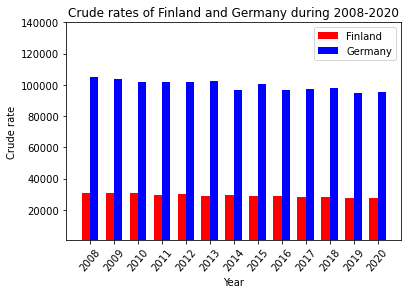

In [81]:
import matplotlib.pyplot as plt
n_groups = 13
index = np.arange(n_groups)
bar_width = 0.35

fig, ax = plt.subplots()

plt.bar(index, crude_rate.Finland, bar_width, color='r', label='Finland')
plt.bar(index + bar_width, crude_rate.Germany, bar_width, color='b', label='Germany')
plt.ylim(800, 140000)
ax.set_xticklabels([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel("Year")
plt.ylabel("Crude rate")
plt.title("Crude rates of Finland and Germany during 2008-2020")
ax.set_xticks(index + bar_width / 2)
plt.xticks(rotation=50)
ax.legend()